In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

from itertools import product
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.naive_bayes import GaussianNB # Import Naive Bayes Classifier
from sklearn.svm import SVC, LinearSVC # Import SVM Classifier
from sklearn.neighbors import KNeighborsClassifier # Import KNN Classifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from pprint import pprint
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from prettytable import PrettyTable
from scipy import stats
from matplotlib.pyplot import pie, axis, show
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif, SelectFromModel, RFE
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

from helpers import Trainer, plot_conf_mat, plot_roc, plot_roc_avg, plot_pie_chart, stats_test

random.seed(0)

In [2]:
X_cs_15 = np.load('npy_data/X_combinedSampling_15Features_task2.npy')
y_cs_15 = np.load('npy_data/y_combinedSampling_15Features_task2.npy')
print('X_cs_15.shape, y_cs_15.shape', X_cs_15.shape, y_cs_15.shape)

classes = ['Female', 'Male']

X_cs_15.shape, y_cs_15.shape (22267, 15) (22267,)


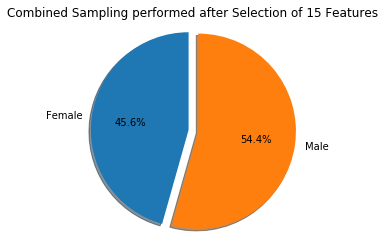

In [3]:
plot_pie_chart(classes, y_cs_15, 15)

In [4]:
kfold = StratifiedKFold(10, random_state=False, shuffle=True)

folds_15 = kfold.split(X_cs_15, y_cs_15)
folds_15 = [(train, test) for train, test in folds_15]

In [5]:
data_classes_15  = []

for i in range(2):
    data_classes_15.append(len(y_cs_15[y_cs_15==i]))
    
cls2clr = {
    0: 'red',
    1: 'green'
}
clf2clr = {
    0: 'red',
    1: 'green',
    2: 'blue',
    3: 'purple',
    4: 'cornflowerblue',
}

In [6]:
trainer = Trainer(X=X_cs_15, y=y_cs_15, folds=folds_15, data_classes=data_classes_15, classes=classes)

----------------15 Selected Features----------------
+---------------+-----------------------+
|    XGBoost    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         1.7349        |
|    Accuracy   |   0.7460826070310019  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+
| Metric / Class |       Female       |        Male        |
+----------------+--------------------+--------------------+
|   Percision    | 0.7496809636222745 | 0.7437224468129225 |
|     Recall     | 0.6659448818897638 | 0.813332605387256  |
|  Specificity   | 0.813332605387256  | 0.6659448818897638 |
|    F1-score    | 0.7052776817698974 | 0.7769410380393423 |
+----------------+--------------------+--------------------+
+--------+--------+--------+
|        | Female |  Male  |
+--------+--------+--------+
| Female | 6766.0 | 2260.0 |
|  Male  | 3394.0 | 9847.0 |
+--------+--------+--------+


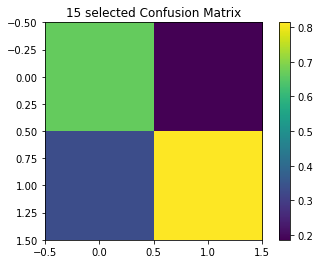

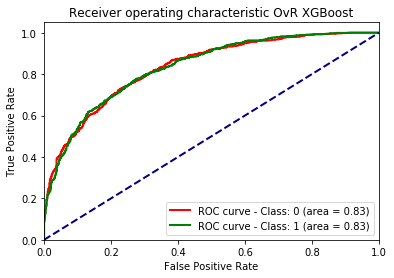

In [7]:
tables, xgboost_metrics_15 = trainer.train_model(model_name='XGBoost')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')
plot_roc(xgboost_metrics_15, data_classes_15, cls2clr, 'XGBoost')

----------------15 Selected Features----------------
+---------------+-----------------------+
|    AdaBoost   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   0.5095000000000001  |
|    Accuracy   |   0.7217416852957517  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+
| Metric / Class |       Female       |        Male        |
+----------------+--------------------+--------------------+
|   Percision    | 0.7119975248182209 | 0.7288736372444036 |
|     Recall     | 0.6552165354330709 | 0.7775686373531882 |
|  Specificity   | 0.7775686373531882 | 0.6552165354330709 |
|    F1-score    | 0.6823730950030363 | 0.752402395590682  |
+----------------+--------------------+--------------------+
+--------+--------+--------+
|        | Female |  Male  |
+--------+--------+--------+
| Female | 6657.0 | 2693.0 |
|  Male  | 3503.0 | 9414.0 |
+--------+--------+--------+


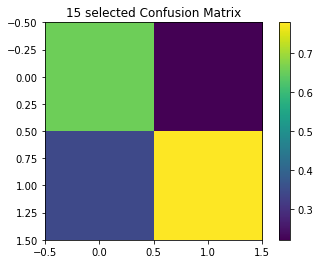

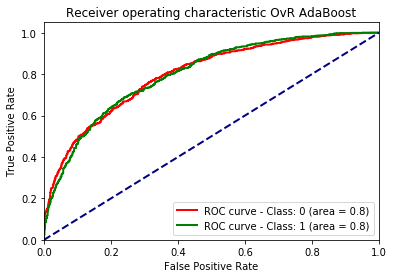

In [8]:
tables, adaboost_metrics_15 = trainer.train_model(model_name='AdaBoost')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')
plot_roc(adaboost_metrics_15, data_classes_15, cls2clr, 'AdaBoost')

----------------15 Selected Features----------------
+---------------+-----------------------+
|     XTrees    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         1.3527        |
|    Accuracy   |   0.8953609644923791  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+
| Metric / Class |       Female       |        Male        |
+----------------+--------------------+--------------------+
|   Percision    | 0.8989020546100116 | 0.8926833339559355 |
|     Recall     | 0.8684055118110235 | 0.9179830206577447 |
|  Specificity   | 0.9179830206577447 | 0.8684055118110235 |
|    F1-score    | 0.8833426292872207 | 0.9051267917992856 |
+----------------+--------------------+--------------------+
+--------+--------+---------+
|        | Female |   Male  |
+--------+--------+---------+
| Female | 8823.0 |  993.0  |
|  Male  | 1337.0 | 11114.0 |
+--------+--------+---------+


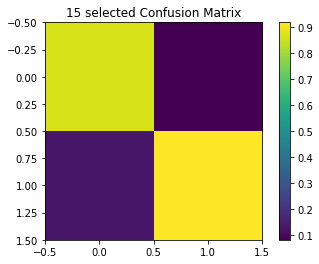

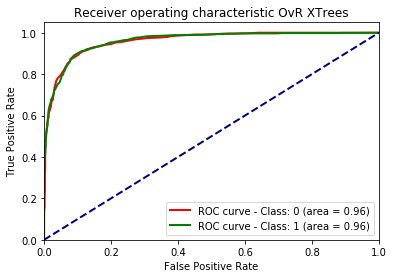

In [9]:
tables, xtrees_metrics_15 = trainer.train_model(model_name='XTrees')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')
plot_roc(xtrees_metrics_15, data_classes_15, cls2clr, 'XTrees')

----------------15 Selected Features----------------
+---------------+-----------------------+
|      KNN      | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         0.5197        |
|    Accuracy   |   0.8122336706539162  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+
| Metric / Class |       Female       |        Male        |
+----------------+--------------------+--------------------+
|   Percision    | 0.8222805979241707 | 0.8051006810872412 |
|     Recall     | 0.7507874015748032 | 0.8637989913397165 |
|  Specificity   | 0.8637989913397165 | 0.7507874015748032 |
|    F1-score    | 0.7848875808111877 | 0.8334057724422754 |
+----------------+--------------------+--------------------+
+--------+--------+---------+
|        | Female |   Male  |
+--------+--------+---------+
| Female | 7628.0 |  1649.0 |
|  Male  | 2532.0 | 10458.0 |
+--------+--------+---------+


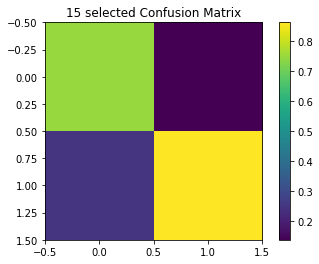

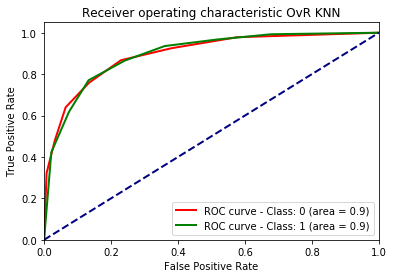

In [10]:
tables, knn_metrics_15 = trainer.train_model(model_name='KNN')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')
plot_roc(knn_metrics_15, data_classes_15, cls2clr, 'KNN')

----------------15 Selected Features----------------
+---------------+-----------------------+
|       DT      | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         0.0254        |
|    Accuracy   |   0.6970856929838044  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+
| Metric / Class |       Female       |        Male        |
+----------------+--------------------+--------------------+
|   Percision    | 0.7361014412856497 | 0.6786788687449993 |
|     Recall     | 0.5248031496062993 | 0.8416606042407409 |
|  Specificity   | 0.8416606042407409 | 0.5248031496062993 |
|    F1-score    | 0.6123034694397212 | 0.7513041806901013 |
+----------------+--------------------+--------------------+
+--------+--------+---------+
|        | Female |   Male  |
+--------+--------+---------+
| Female | 5332.0 |  1917.0 |
|  Male  | 4828.0 | 10190.0 |
+--------+--------+---------+


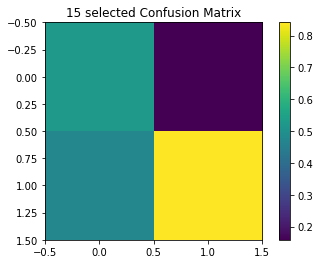

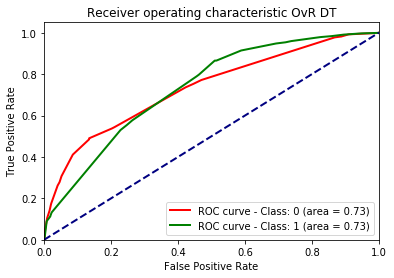

In [11]:
tables, dt_metrics_15 = trainer.train_model(model_name='DT')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')
plot_roc(dt_metrics_15, data_classes_15, cls2clr, 'DT')

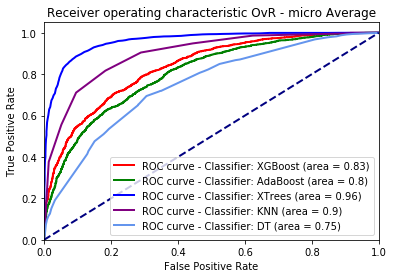

In [12]:
plot_roc_avg([xgboost_metrics_15,
                adaboost_metrics_15,
                xtrees_metrics_15,
                knn_metrics_15,
                dt_metrics_15], 
               ['XGBoost',
                'AdaBoost',
                'XTrees',
                'KNN',
                'DT'], 
               clf2clr,
            micro=True, macro=False)

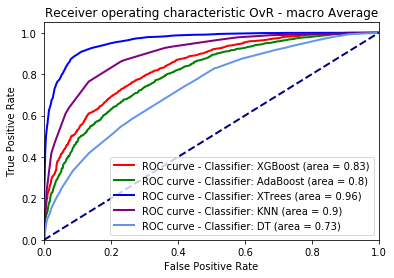

In [13]:
plot_roc_avg([xgboost_metrics_15,
                adaboost_metrics_15,
                xtrees_metrics_15,
                knn_metrics_15,
                dt_metrics_15], 
               ['XGBoost',
                'AdaBoost',
                'XTrees',
                'KNN',
                'DT'], 
               clf2clr,
               micro=False, macro=True)

In [14]:
all_scores = [xgboost_metrics_15['recall'], 
              adaboost_metrics_15['recall'], 
              xtrees_metrics_15['recall'], 
              knn_metrics_15['recall'], 
              dt_metrics_15['recall']]
all_clf = ['XGBoost',
           'AdaBoost',
           'XTrees',
           'KNN',
           'DT']
print(stats_test(all_scores, all_clf))

+------------------------------+----------+------------+------------+
| Classifier-1 vs Classifier-2 | avg_diff | stdev_diff |   pvalue   |
+------------------------------+----------+------------+------------+
|     XGBoost vs AdaBoost      |   0.02   |    0.02    | 0.01324972 |
|      AdaBoost vs XTrees      |  -0.18   |    0.04    |    0.0     |
|       AdaBoost vs KNN        |  -0.09   |    0.01    |   3e-08    |
|        AdaBoost vs DT        |   0.03   |    0.10    |  5.05e-06  |
|         XTrees vs DT         |   0.21   |    0.14    |   8e-08    |
|        XTrees vs KNN         |   0.09   |    0.03    |   1e-08    |
|        XGBoost vs DT         |   0.06   |    0.09    | 0.00155046 |
|        XGBoost vs KNN        |  -0.07   |    0.02    |  1.2e-07   |
|          KNN vs DT           |   0.12   |    0.10    | 0.00457686 |
|      XGBoost vs XTrees       |  -0.15   |    0.05    |    0.0     |
+------------------------------+----------+------------+------------+
